# Parallel Programming with Python
_Thomas Langford, Ph.D._

_Yale Center for Research Computing_

_Yale Wright Laboratory_

_October 16, 2018_

# Tools and Requirements

- Language: Python 3.6
- Modules: `numpy`, `multiprocessing`, `PIL` (for imamge processing), `mpi4py`, `matplotlib`
- Jupyter notebook

# Comment: Python 2 versus 3

- Major modules will be dropping Python2 support in 2019
- Worth transitioning to get new features
- This tutorial uses python 3
- see https://wiki.python.org/moin/Python2orPython3

# How to Follow Along

## Clone from GitHub

Navigate to the GitHub repository: https://github.com/ycrc/parallel_python

Clone or download the zip file that contains this notebook and required data.

## MyBinder

Launch a live AWS container with the required tools installed:

https://mybinder.org/v2/gh/ycrc/parallel_python/master



# Travelling Salesman Problem

In [24]:
import random, numpy, math, copy, matplotlib.pyplot as plt


In [167]:
# number of cities to simulate
numCities = 30

# define coordinates for each of the cities
cities = [random.sample(range(100), 2) for x in range(numCities)];

In [182]:
# start with a high "temperature" that will allow jumps from one local minimum to another
# then slowly lower the temperature to let the problem "anneal" and pick a minumum
def tsp(seed):
    random.seed(seed)
    tour = random.sample(range(numCities),numCities);
#     print(tour)
    distance = np.zeros(500000)
    k = 0
    for temperature in numpy.logspace(-1,5,num=500000)[::-1]:

        # set up starting values for each 
        [i,j] = sorted(random.sample(range(numCities),2))
        newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:]

        oldDistances =  sum([ math.sqrt(sum([(cities[tour[(k+1) % numCities]][d] - cities[tour[k % numCities]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])
        newDistances =  sum([ math.sqrt(sum([(cities[newTour[(k+1) % numCities]][d] - cities[newTour[k % numCities]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])

        distance[k] = (oldDistances - newDistances) / temperature

        if math.exp( ( oldDistances - newDistances) / temperature) > random.random():
            tour = copy.copy(newTour)
        k += 1
    return (tour, distance)


In [183]:
seed_list = [10,20,40,80]
with multiprocessing.Pool(processes=4) as pool:
    result = pool.map(tsp, seed_list)

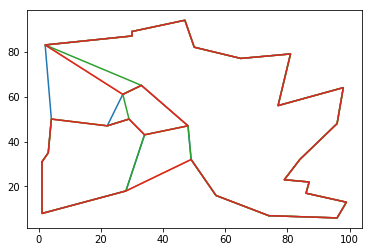

In [184]:
for tour,dist in result:
    plt.plot([cities[tour[i % numCities]][0] for i in range(numCities+1)], 
             [cities[tour[i % numCities]][1] for i in range(numCities+1)],
             );
plt.show()

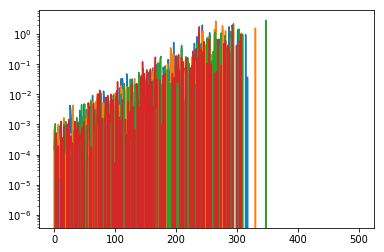

In [185]:
for tour,dist in result:
    plt.plot(dist[::1000]);
plt.yscale('log')


In [186]:
for tour, dist in result:
    print(dist[-1])

-1469.922761048572
-1835.363115885832
-1844.4652364933352
-2798.188916160699


In [187]:
dist[-10:]

array([-2256.69463067, -1882.30257233, -1626.10056242, -1331.45480589,
        -189.84542572,  -730.8731169 ,  -376.54493992, -1923.14194856,
        -459.90338273, -2798.18891616])